In [1]:
import numpy as np
import SimpleITK as sitk
from tqdm import tqdm
import matplotlib.pyplot as plt
from imageio import imread, imwrite
import random, gc, pickle, os
from os.path import exists, isfile, join
from PIL import Image
from skimage.exposure import equalize_adapthist as equalize
from skimage.exposure import adjust_gamma as gamma
from skimage.transform import resize

# Load Data and convert to .tif

In [2]:
def load_folder_list(path=""):
    return [os.path.join(path, o) for o in os.listdir(path) if os.path.isdir(os.path.join(path, o))]

In [3]:
def get_data_path(img_folder):

    img_path = load_folder_list(path = img_folder)
    img_path.sort()

    return img_path

In [4]:
def get_data_name(data_path):

    if exists(data_path):
           data_name = [f for f in os.listdir(data_path) if isfile(join(data_path,f))]
            
    data_name.sort()
    return data_name

In [5]:
def get_data(img_path):

    name = get_data_name(img_path)
    img = []
    
    for p in tqdm(range(len(name))):
        img.append(np.array(Image.open(join(img_path, name[p])).convert('L')))
    
    return img

In [6]:
img_path = "data/raw_data/unlabeled/train"
img = get_data(img_path)

100%|██████████| 397/397 [00:00<00:00, 557.20it/s]


In [7]:
image = np.asarray(img, dtype = np.uint8)
image.shape

(397, 605, 700)

In [8]:
np.unique(image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

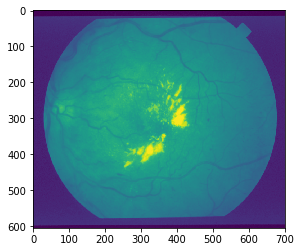

In [9]:
plt.imshow(image[0])

# Resize Image to 512 x 512

In [10]:
def res_img(image, size):
    img = []
    for i in tqdm(range(image.shape[0])):
        img.append(resize(image[i], size))
    img = np.asarray(img)
    return img

In [11]:
image = res_img(image, (512, 512))

100%|██████████| 397/397 [00:08<00:00, 47.51it/s]


In [12]:
image.shape

(397, 512, 512)

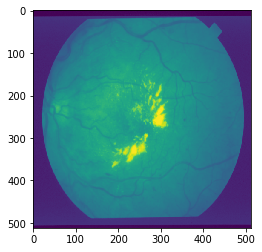

In [13]:
plt.imshow(image[0])

# Contrast-limited adaptive histogram equalization (CLAHE)

In [14]:
img = []
for i in tqdm(range(image.shape[0])):
    img.append(equalize(image[i]))
image = np.asarray(img)
image.shape

  0%|          | 0/397 [00:00<?, ?it/s]/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
100%|██████████| 397/397 [00:12<00:00, 31.90it/s]


(397, 512, 512)

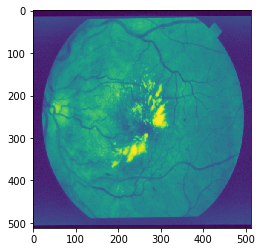

In [15]:
plt.imshow(image[0])

# Gamma Correction

In [16]:
img = []
for i in tqdm(range(image.shape[0])):
    img.append(gamma(image[i]))
image = np.asarray(img)
image.shape

100%|██████████| 397/397 [00:00<00:00, 602.39it/s]


(397, 512, 512)

In [17]:
np.unique(image)

array([0.00000000e+00, 6.11882763e-05, 6.11995104e-05, ...,
       9.99938834e-01, 9.99938879e-01, 1.00000000e+00])

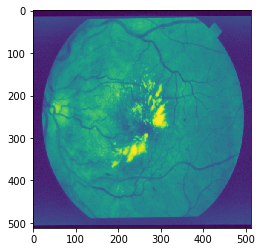

In [18]:
plt.imshow(image[0])

# Save Image

In [20]:
for j in tqdm(range(image.shape[0])):
    img_savepath = "data/Original/Testing/train/"+str(j+41)+".tif";
    
    im = Image.fromarray(image[j])
    im.save(img_savepath)

100%|██████████| 397/397 [00:02<00:00, 190.94it/s]
